# **Prompt**

Checkpoint 2 (25 points)


● (5 points) **Data preprocessing**: (a) import, (b) parse (e.g., convert strings to ints), (c)
organize (e.g., set up a database or a pandas DataFrame).

● (20 points) **Basic data exploration and summary statistics**
○ You must present three conclusions using at least three different statistical
methods including hypothesis testing.

■ For example: What are the main characteristics of your dataset? How
many features and entries are there? Is a feature over-represented? Are
features correlated? Are there outliers? Identify the attributes that will
affect your choice of primary analysis technique. Etcetera.

○ For each method, you must have at least one gorgeous plot.


# **Data Preprocessing**

**Imports**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import sqlite3
from scipy import stats
from collections import Counter
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from scipy.stats import chi2_contingency

**Panda dataframe set up**

In [20]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


**Parsing the columns in the dataset**

In [21]:
df['SleepTime'].astype(float)
df['BMI'].astype(float)

0         16.60
1         20.34
2         26.58
3         24.21
4         23.71
          ...  
319790    27.41
319791    29.84
319792    24.24
319793    32.81
319794    46.56
Name: BMI, Length: 319795, dtype: float64

# **Basic data exploration and summary statistics**

**Exploring our datasets**

Display the number of rows and columns in the dataset.

In [22]:
# Number of Rows
print("Number of Rows:", df.shape[0])


# Number of Columns
print("Number of Columns:",df.shape[1])

Number of Rows: 319795
Number of Columns: 18


Display the name of the columns in the dataset.

In [23]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Display the types of the columns in the dataset.

In [24]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

Examine if there is any missing data in our dataset.

In [25]:
info = df.count()
print(info)

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64


# Based on the above information, we can see that there is no missing datas in our dataset. So there is no need to do further analysis to check for missing values. And we will not drop duplicate datas for the purposes of our analysis.

Display the summary statistics for numerical columns.

In [26]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


**Statistical Analysis**

# For the purposes of our analysis we will take alpha 0.05 for the whole project.

# 1. Chi-Sqaured test

- HO: There is no association between race and the prevalence of heart disease.

- HA: There is an association between race and the prevalence of heart disease.

Create a contingency table and display it.

In [27]:
con_table = pd.crosstab(df['Race'], df['HeartDisease'])
con_table

HeartDisease,No,Yes
Race,,
American Indian/Alaskan Native,4660,542
Asian,7802,266
Black,21210,1729
Hispanic,26003,1443
Other,10042,886
White,222705,22507


# Why are we using the Chi-squared test?

We are using the Chi-squared test because Chi-squared test is a statistical method used to determine if there is a significant association between two categorical variables. This makes the Chi-squared test an appropriate choice for analyzing the relationship between HeartDisease and Race.

Create a plot showing the relationship between heart disease, and race.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Native'),
  Text(5, 0, 'Asian')])

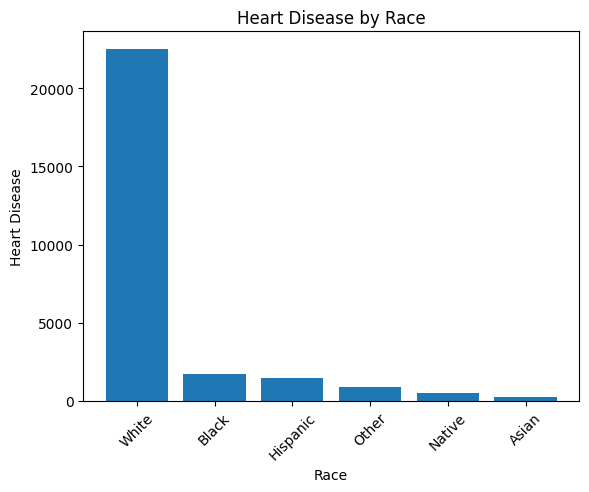

In [28]:
df.loc[df['Race'] == 'American Indian/Alaskan Native', 'Race'] = 'Native'

HeartDisease_Y = df[df['HeartDisease'] == 'Yes']

race = HeartDisease_Y['Race'].value_counts()

plt.bar(x=race.index, height=race.values)
plt.title('Heart Disease by Race')
plt.xlabel('Race')
plt.ylabel('Heart Disease')
plt.xticks(rotation=45)

# P-value using the chi2_contingency() function

In [29]:
x = chi2_contingency(con_table)
print(x.pvalue)

2.9886131565632597e-180


# **Conclusion 1 based on Chi-squared test**

# Since we are assuming the alpha is 0.05 and our p-value is less than the given alpha value, we will conclude that there is an association between heart disease and race.

## 2. Pearson Correlation test

### **Question**: Is there a linear correlation between BMI and physical health?

# Why are we using the Pearson Correlation test?

The Pearson correlation coefficient (r) is the most common way of measuring a linear correlation. In this test we want to calculates the pairwise correlation coefficients between BMI and physical health. We want to see if they are   positive linear relationship, anti-correlated (negative linear relationship) or
no linear relationship.



In [30]:
df['BMI'].corr(df['PhysicalHealth'])

0.10978754360968271

Create a plot showing the relationship between BMI, and physical health.

<Axes: xlabel='BMI', ylabel='PhysicalHealth'>

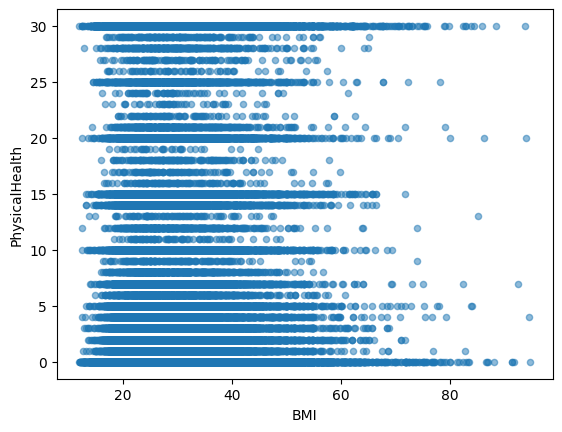

In [31]:
df.plot.scatter("BMI", "PhysicalHealth", alpha = 0.5)

# **Conclusion 2 based on Pearson correlation test**

# Based on the pearson correlation coeffiencent value we can conclude that there is a some positive linear correlation between BMI and physical health. Since correlation coeffiencent is a positive value greater than 0.

# 3. ANOVA test

### **Question**: Is there a significant difference in BMI between individuals with heart disease and individuals without heart disease?

- HO: There is no significant difference in mean BMI between individuals with heart disease and individuals without heart diseasee.

- HA: There is a significant difference in mean BMI between individuals with heart disease and individuals without heart disease.

# Why are we using the ANOVA test?

We are comparing the mean BMI of individuals with heart disease to those without heart disease. ANOVA is a statistical test designed to analyze the differences among group means in a sample. It allows us to compare the means of BMI across two groups: individuals with heart disease and individuals without heart disease.

ANOVA Results for BMI: F_onewayResult(statistic=860.4962832652064, pvalue=6.7794550353687434e-189)


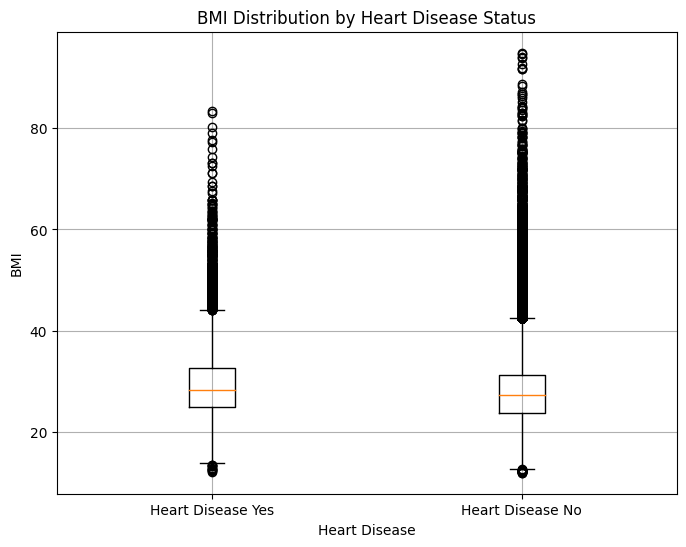

In [32]:
bmi_anova = f_oneway(df[df['HeartDisease'] == "No"]['BMI'],
                     df[df['HeartDisease'] == "Yes"]['BMI'])



print("ANOVA Results for BMI:", bmi_anova)
bmi_heart_disease_yes = df[df['HeartDisease'] == "Yes"]['BMI']
bmi_heart_disease_no = df[df['HeartDisease'] == "No"]['BMI']
plt.figure(figsize=(8, 6))
plt.boxplot([bmi_heart_disease_yes, bmi_heart_disease_no], labels=['Heart Disease Yes', 'Heart Disease No'])
plt.title('BMI Distribution by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

# P-value by applying ANOVA Test

In [33]:
print("p-value:", bmi_anova.pvalue)

p-value: 6.7794550353687434e-189


# **Conclusion 3 based on ANOVA correlation test**

# Based on the ANOVA test p value being less than 0.05, we can conclude that there is a significant difference in mean BMI between individuals with heart disease and individuals without heart disease.

# **Final Conclusions**

1. There is an association between heart disease and race.

2. There is a some positive linear correlation between BMI and physical health.

3. There is a significant difference in mean BMI between individuals with heart disease and individuals without heart disease.